## DIA 003: Regresión Líneal Múltiple con scikit-learn


La Regresión Lineal Múltiple es una extensión de la regresión lineal simple que permite predecir una variable dependiente (objetivo) utilizando múltiples variables independientes (predictores). Esta técnica es fundamental en estadísticas y machine learning para modelar relaciones lineales entre variables y hacer predicciones basadas en ellas.

En este ejercicio, utilizarás scikit-learn, una biblioteca poderosa y ampliamente utilizada en Python para construir y evaluar modelos de regresión. Aprenderás a:

- Preparar y dividir los datos en conjuntos de entrenamiento y prueba.
- Entrenar un modelo de regresión lineal múltiple.
- Evaluar el rendimiento del modelo utilizando métricas como R² y Error 
- Cuadrático Medio (MSE).
- Interpretar los coeficientes del modelo para entender la influencia de cada predictor.

In [1]:
# 1.Importar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2.Cargar y explorar el dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  fl

<function matplotlib.pyplot.show(close=None, block=None)>

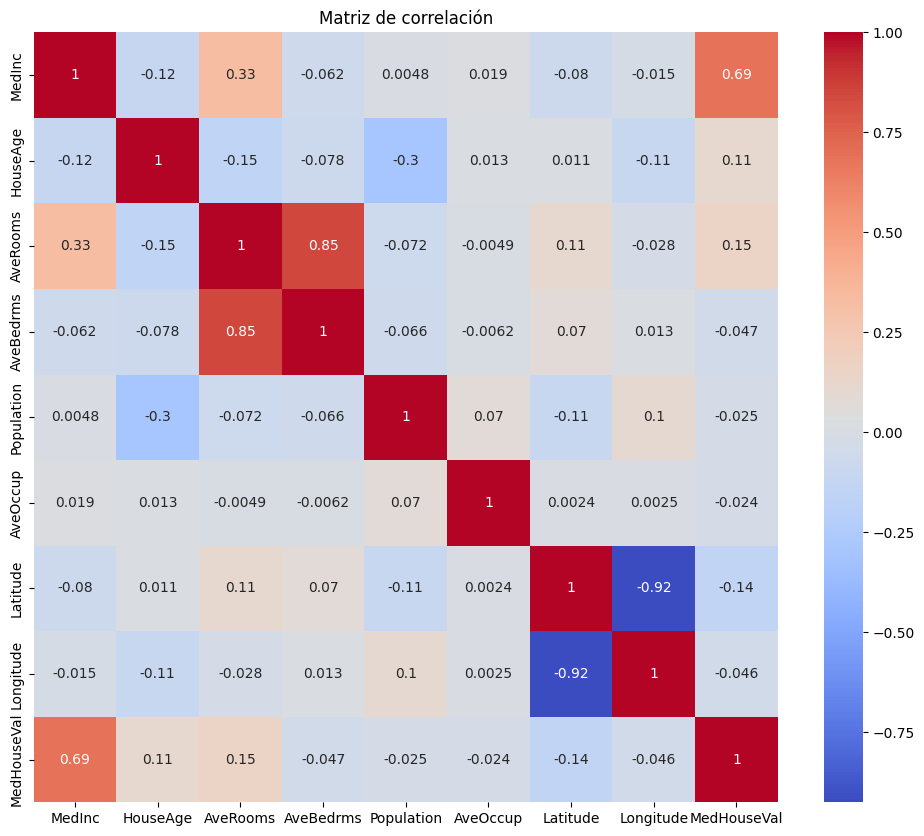

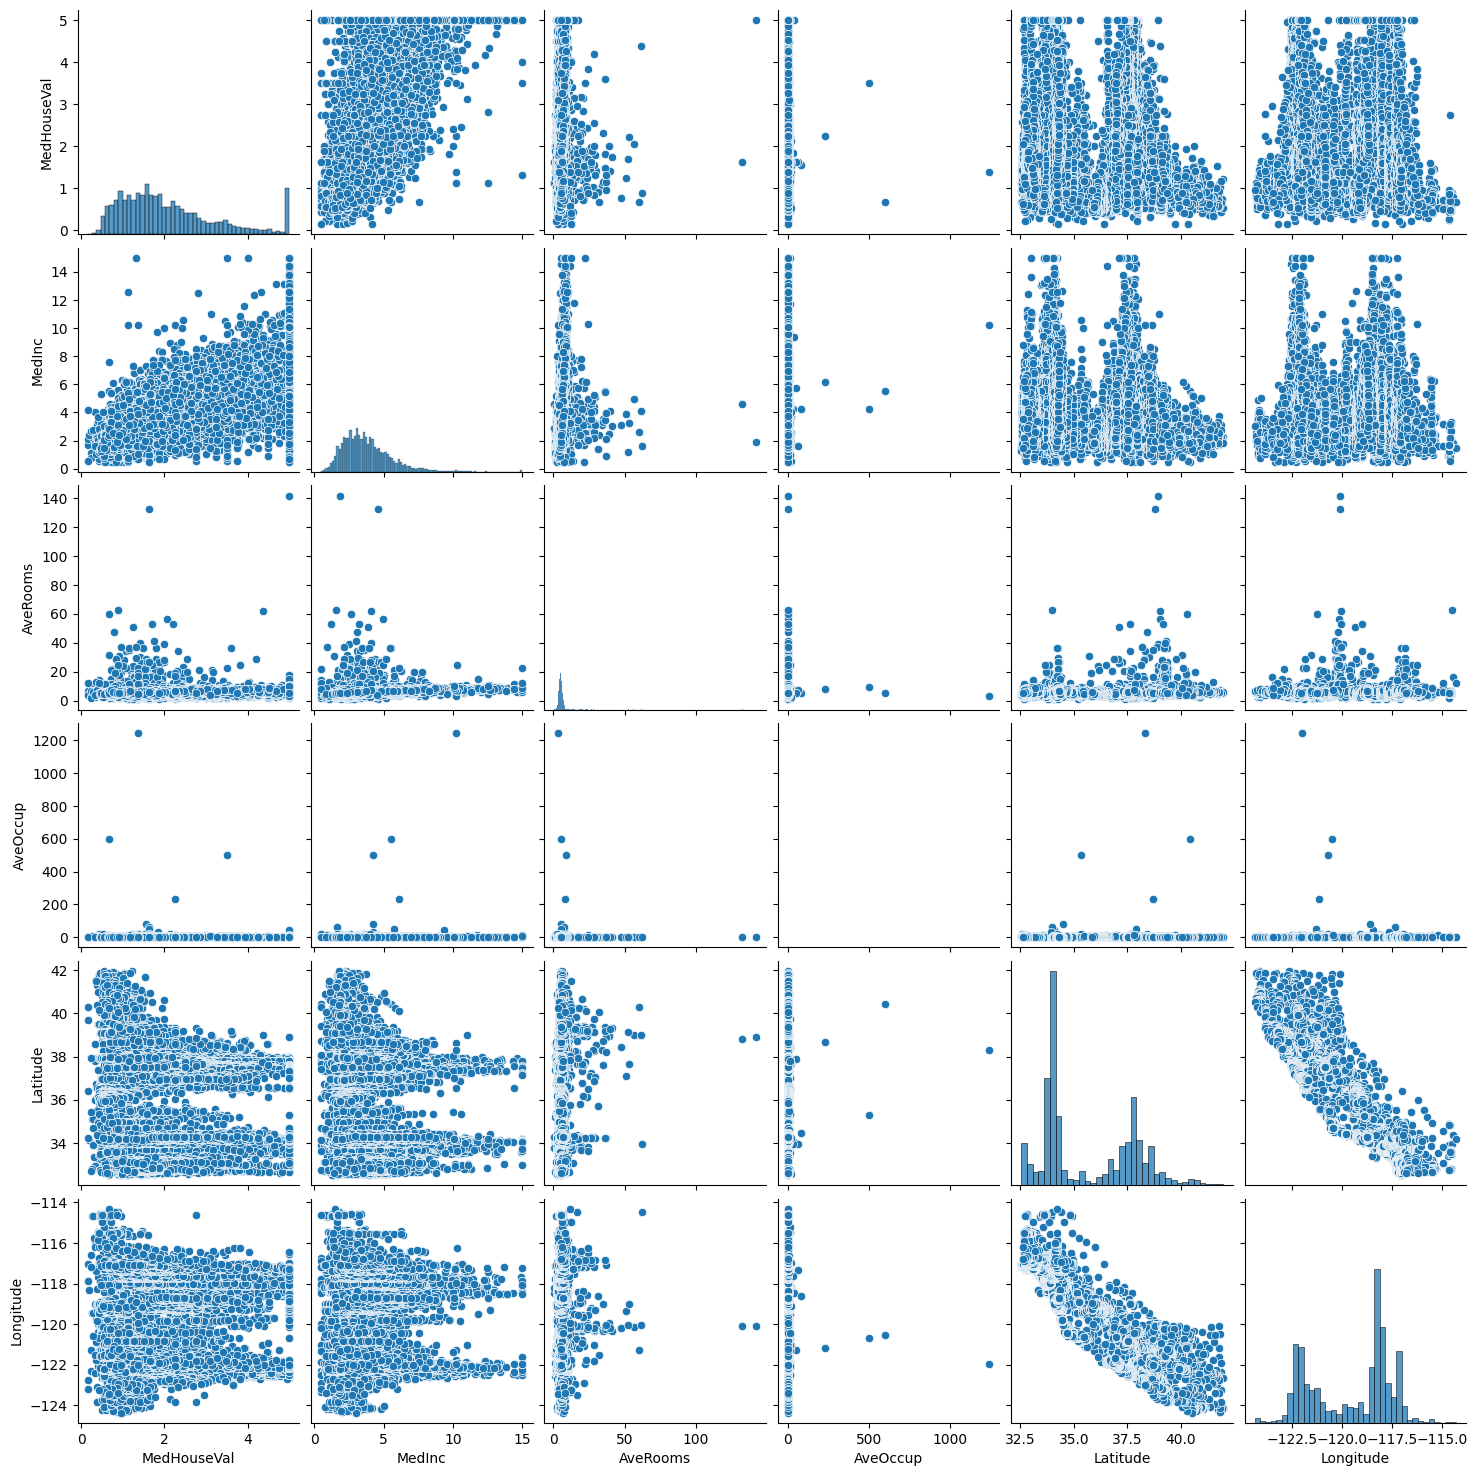

In [4]:
# 3.Visualiza las relacionese entre variables

# Matriz de correlacion:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show

# Pairplot para observar relaciones especificas:
sns.pairplot(df[['MedHouseVal', 'MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']])
plt.show

In [5]:
# 4. Definir variables independientes y dependiente

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [6]:
# 5. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 6.Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 7. Predicciones
y_pred = model.predict(X_test)

In [10]:
# 8. Evaluacion del modelo
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nError Cuadratico Medio (MSE): {mse}")
print(f"Coeficiente de Determinacion (R2): {r2}")


Error Cuadratico Medio (MSE): 0.5332001304956558
Coeficiente de Determinacion (R2): 0.5757877060324511


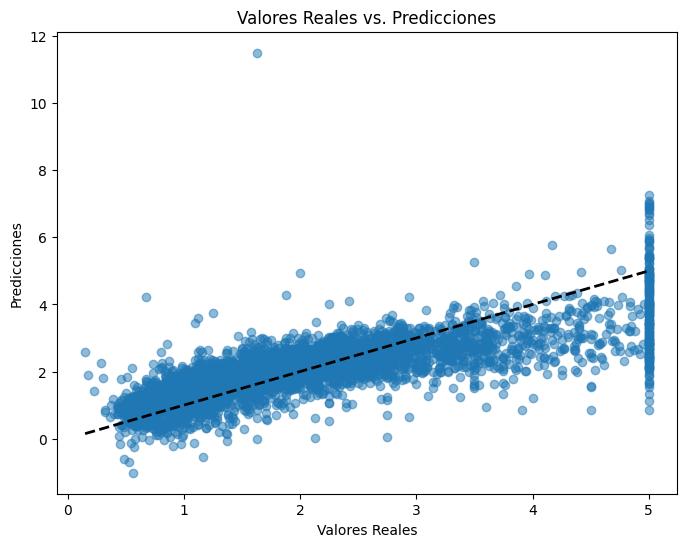

In [11]:
# 9. Visualización de predicciones vs. reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [12]:
# 10. Interpretar los coeficientes
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nCoeficientes del modelo:")
print(coef_df)



Coeficientes del modelo:
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708


In [14]:
# 11. Guardar el modelo entrenado
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
print("\nModelo guardado como 'linear_regression_model.pkl'")


Modelo guardado como 'linear_regression_model.pkl'
